# Setup

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts 

In [2]:
df = pd.read_csv('data.csv')

df = df.drop(['id', 'Unnamed: 32'], axis=1)
diagnosis = df['diagnosis']
df_features = df.drop(['diagnosis'], axis=1)

In [3]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Our class variable 'diagnosis' has two levels 'M' - malignant, i.e cancer - and 'B' - benign, i.e no cancer. We have rougly twice as much cases with no cancer detected. 

In [4]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Note that the data contains means, standard errors and worst values of 10 features:

- radius
- texture 
- perimeter
- area
- smoothness 
- compactness
- concavity
- concave points
- symmetry
- fractal dimension

In [5]:
df.shape

(569, 31)

In [6]:
df.isnull().sum().sum()

0

No missing values.

# Analysis

In [7]:
means = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

se = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

worst = ['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

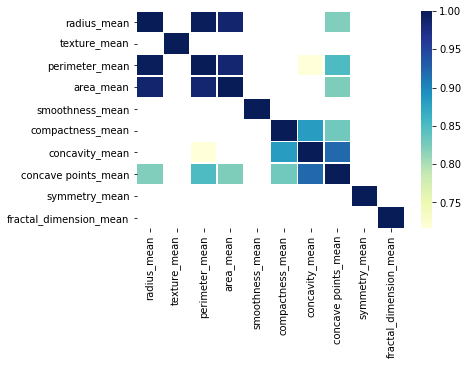

In [8]:
corr = df[means].corr()
corr = corr[(abs(corr)>0.7)]
sns.heatmap(corr, linewidths=.5,cmap="YlGnBu")

plt.savefig('correlations.jpg')

In [9]:
df_normalized = (df_features - df_features.mean())/(df_features.std())
df = pd.concat([diagnosis, df_normalized], axis=1) #now we have normalized dataset
df.columns #normalized df
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,M,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,M,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,M,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,M,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


In [10]:
df_mean = pd.concat([df[means], diagnosis], axis=1)
df_mean.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'diagnosis'],
      dtype='object')

I will change them to two data sets as it's hard to plot.

In [11]:
df_mean_1 = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean','diagnosis']]
df_mean_2 = df[['compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'diagnosis']]

df_mean_3 = df[['concavity_mean', 'radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'diagnosis']]

In [12]:
data_1 = pd.melt(df_mean_1,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

data_2 = pd.melt(df_mean_2,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

data_3 = pd.melt(df_mean_3,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

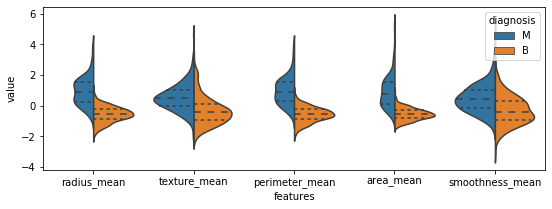

In [13]:
plt.figure(figsize=(9,3))

sns.violinplot(x="features", y="value", hue="diagnosis", data=data_1,split=True, inner="quart")
plt.savefig('violin1.jpg')

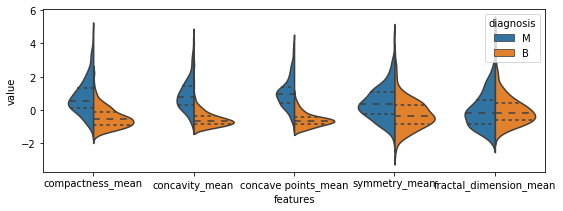

In [14]:
plt.figure(figsize=(9,3))

sns.violinplot(x="features", y="value", hue="diagnosis", data=data_2,split=True, inner="quart")
plt.savefig('violin2.jpg')

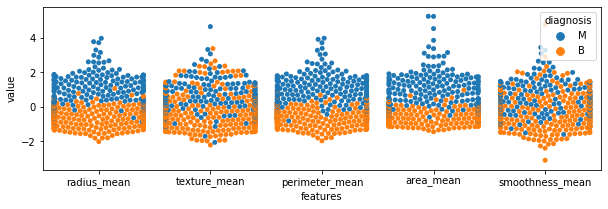

In [15]:
plt.figure(figsize=(10,3))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=data_1)
plt.savefig('swarm1.jpg')

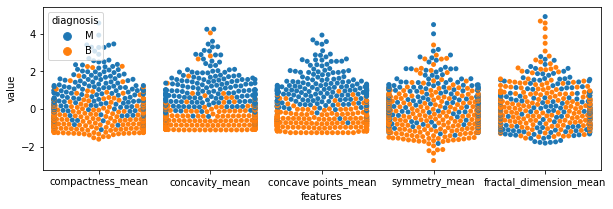

In [16]:
plt.figure(figsize=(10,3))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=data_2)
plt.savefig('swarm2.jpg')

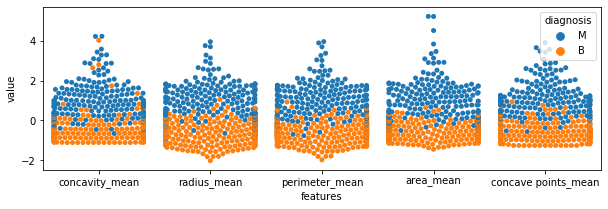

In [17]:
plt.figure(figsize=(10,3))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=data_3)
plt.savefig('swarm3.jpg')

Looks like cases with cancer have bigger values of each feature except from symmetry and fractal_dimension

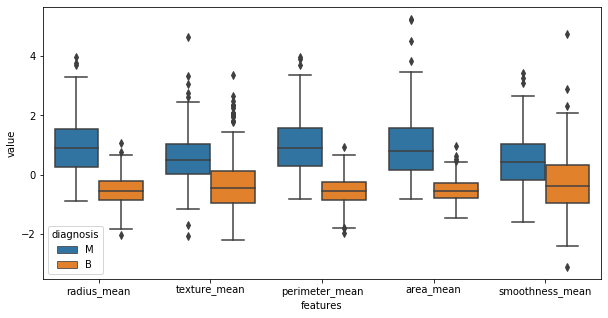

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data_1)
plt.savefig('box1.jpg')

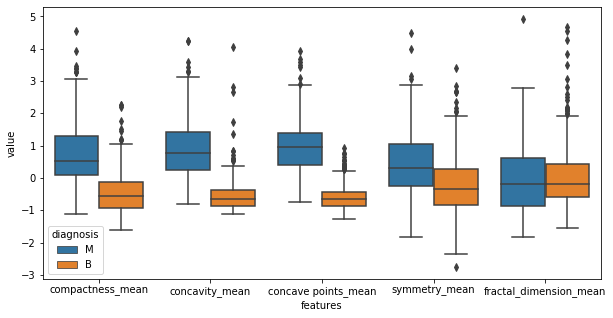

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data_2)
plt.savefig('box2.jpg')

<Figure size 3600x3600 with 0 Axes>

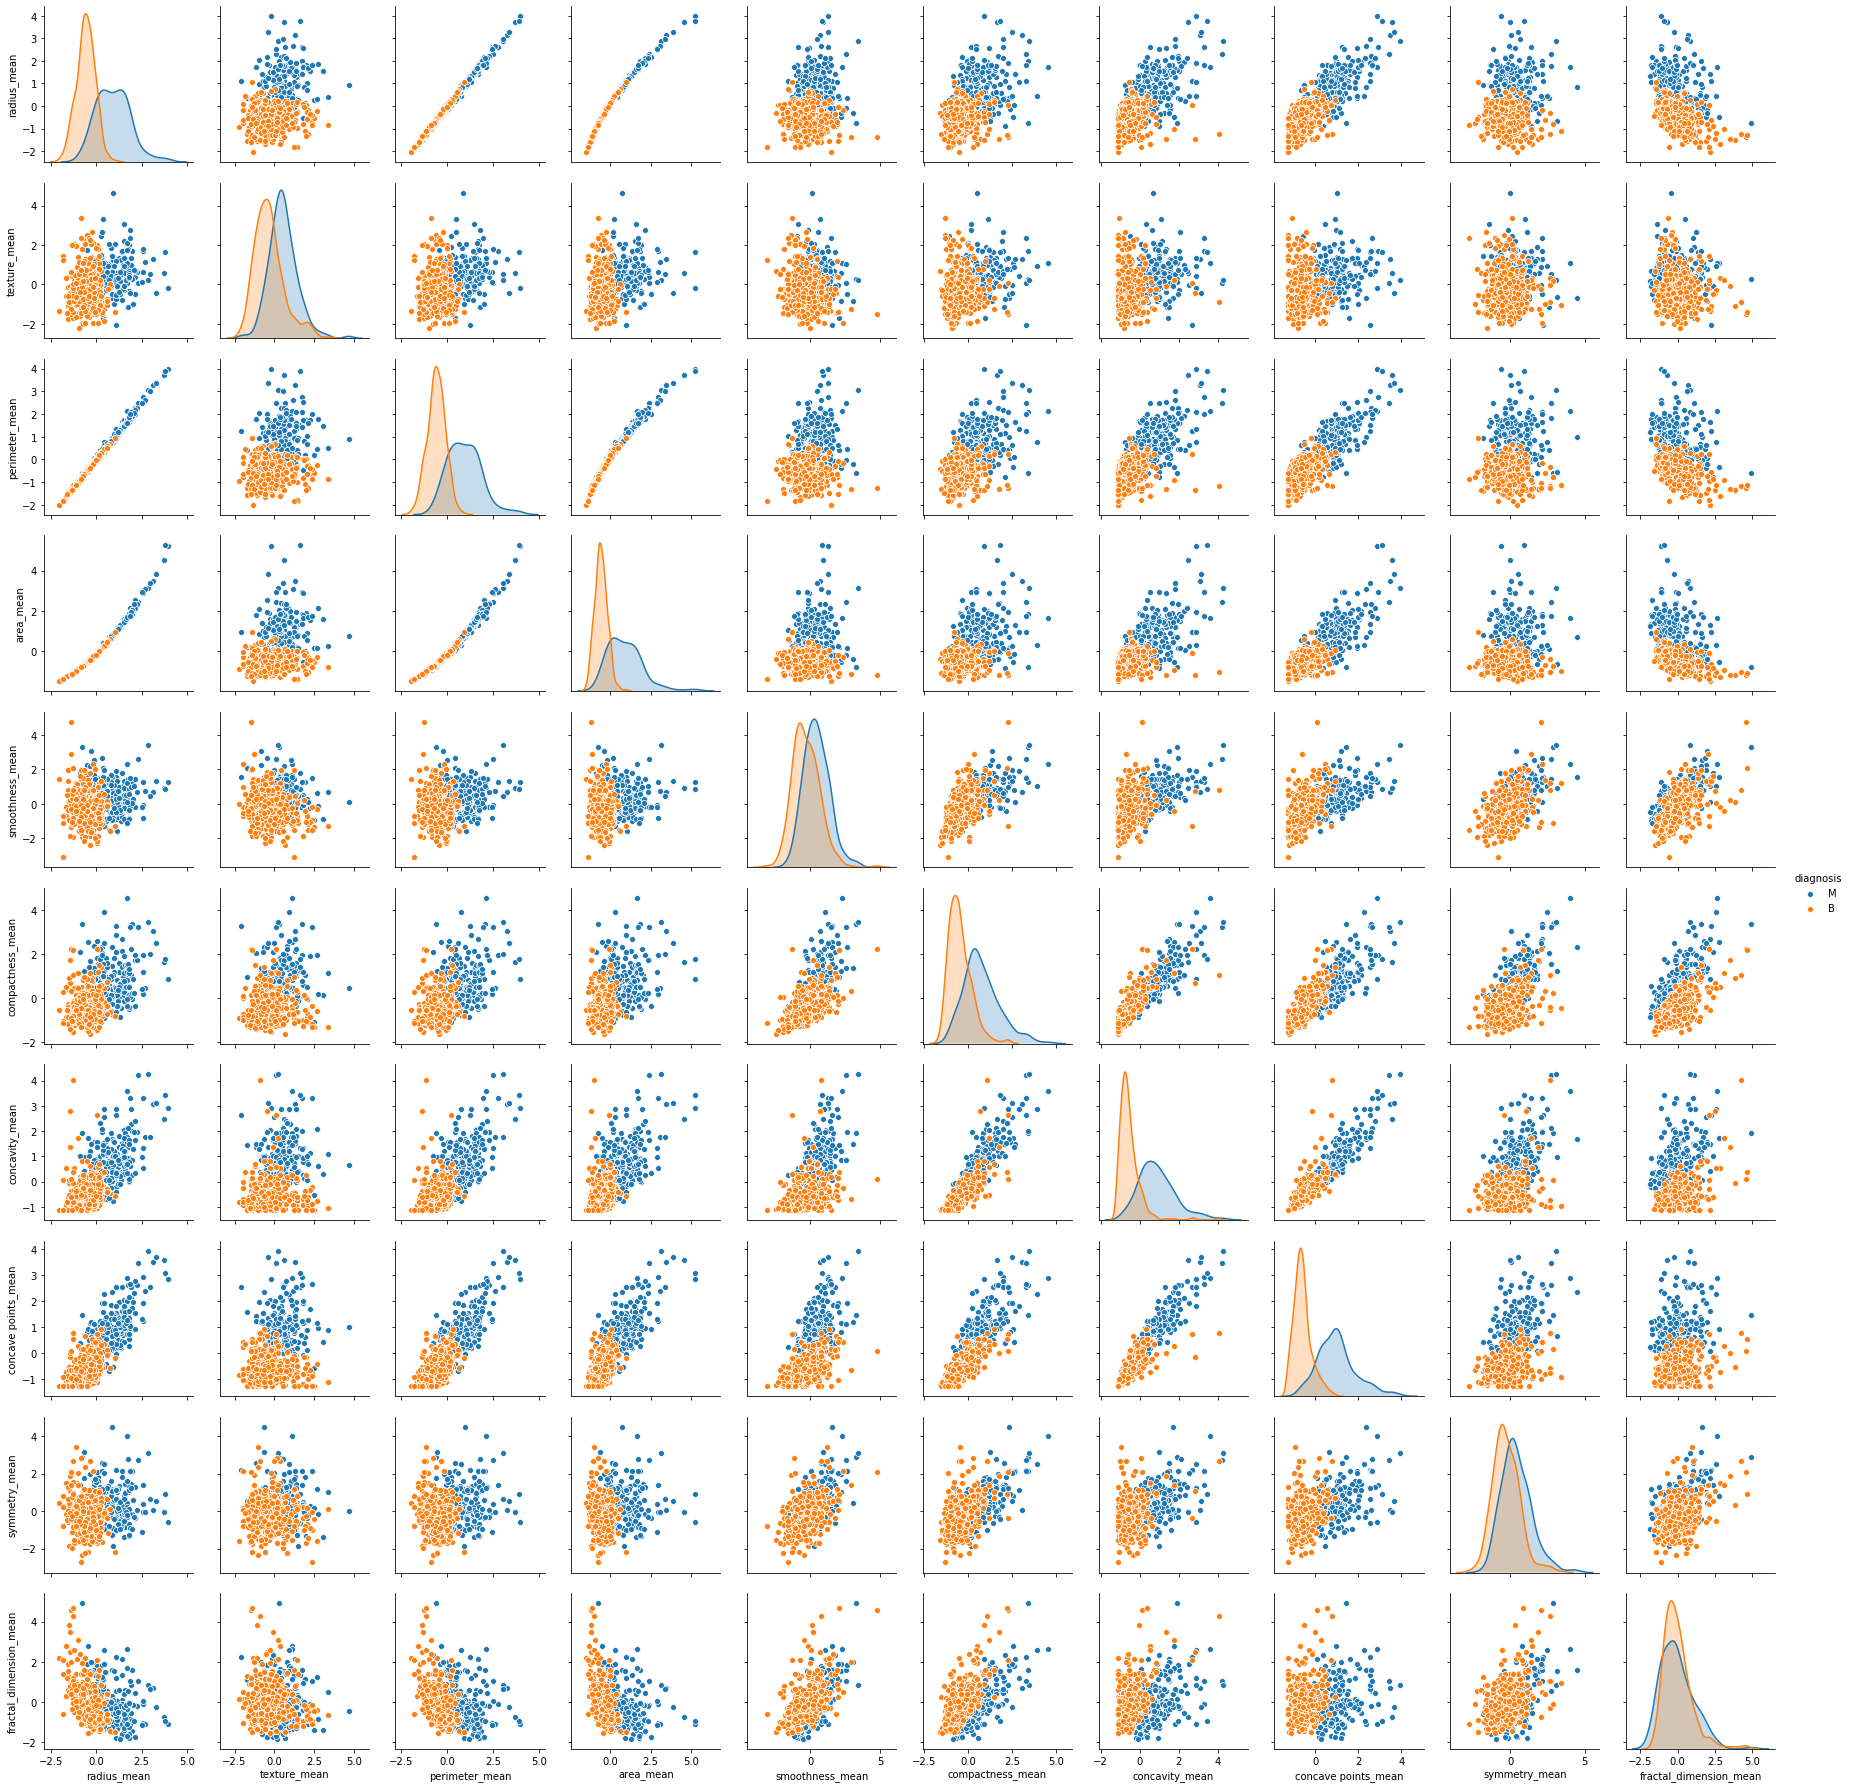

In [20]:
plt.figure(figsize=(50,50))
sns.pairplot(df_mean, hue='diagnosis')
plt.savefig('mean_pairplot.jpg')

In [21]:
a=df[(diagnosis=='M')].shape[0]
b=df[(diagnosis=='B')].shape[0]



print(round(a*100/(a+b)),'% of observations are of cancer, and', round(b*100/(a+b)),'% are others.')

37 % of observations are of cancer, and 63 % are others.


In [22]:
a+b

569

Most of plots show clearly two clusters. Example:

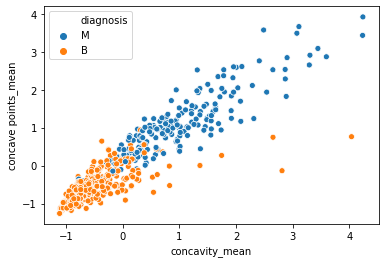

In [23]:
sns.scatterplot(x='concavity_mean', y='concave points_mean', hue='diagnosis', data=df_mean)

plt.savefig('concavity_concave points.jpg')

This is promising for cluster analysis. 

In [24]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

However, some of variables don't provide too much information, for example 'fractal_dimension_mean' is pretty much the same for both cases. We can drop such variables, won't help us with cluster analysis. (similar situation is observed for worst values and s.e for those variables)

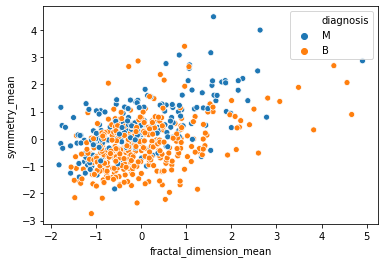

In [25]:
sns.scatterplot(x='fractal_dimension_mean', y='symmetry_mean', hue='diagnosis', data=df)
plt.savefig('fractal_symmetry.jpg')

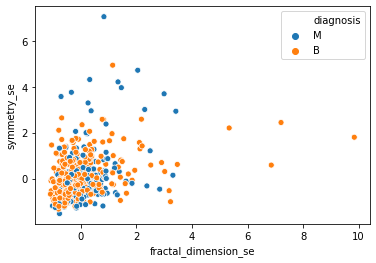

In [26]:
sns.scatterplot(x='fractal_dimension_se', y='symmetry_se', hue='diagnosis', data=df)
plt.savefig('fractal_symmetry_se.jpg')

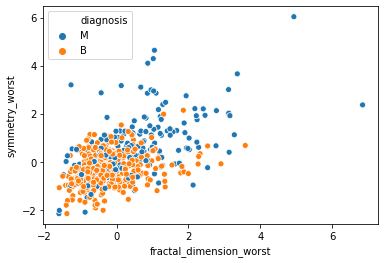

In [27]:
sns.scatterplot(x='fractal_dimension_worst', y='symmetry_worst', hue='diagnosis', data=df)
plt.savefig('fractal_symmetry_worst.jpg')

In [28]:
df = df.drop(['fractal_dimension_mean', 'symmetry_mean'], axis=1)

In [29]:
df.shape

(569, 29)

In [30]:
df.to_csv('cancer_df.csv')